In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/cuekoo/Binary-classification-dataset/refs/heads/master/data0/data.csv',header=None)

In [17]:
data.columns = ['Target','X','Y']

In [95]:
data['Target'] = data['Target'].replace(-1,0)

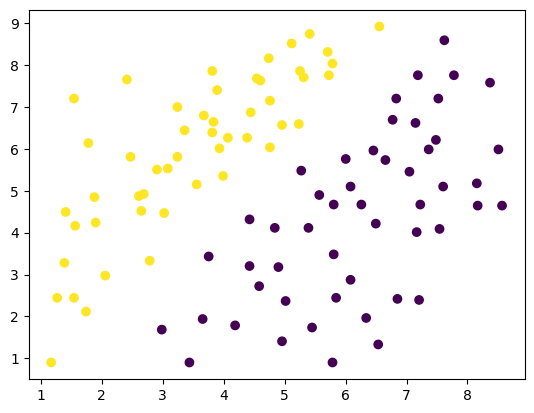

In [96]:
plt.scatter(data['X'],data['Y'],c=data['Target'])

In [97]:
def perceptron_tricks(x,y,epochs,learning_rate):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])

    for i in range(epochs):
        index = np.random.randint(0,x.shape[0])
        ypred = 1 if np.dot(x[index],weights) >= 0 else 0
        weights = weights + ((learning_rate*(y[index]-ypred))*x[index])
    return weights[0],weights[1:]


In [99]:
intercept,weights = perceptron_tricks(
    x=data.iloc[:,1:],
    y=data.iloc[:,0],
    epochs=10000,
    learning_rate=0.1
)

In [100]:
print(f'Intercept - {intercept} \n Coef - {weights}')

Intercept - 0.8 
 Coef - [-0.66419  0.46813]


In [103]:
m = -(weights[0]/weights[1])
b = -(intercept/weights[1])

x_data = np.linspace(0,10,100)
y_data = (m*x_data) + b

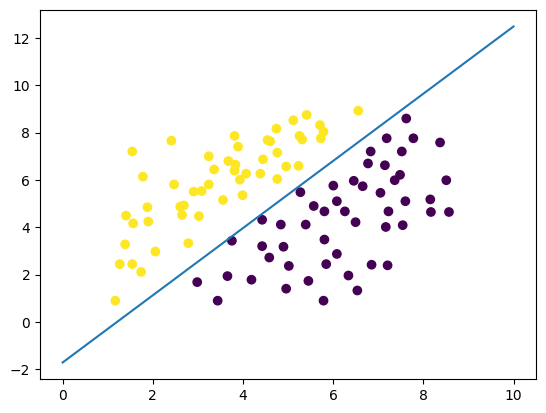

In [104]:
plt.scatter(data['X'],data['Y'],c=data['Target'])
plt.plot(x_data,y_data)